# ML-QuIC Demonstration Notebook

### Metrics Quick Reference
Accuracy = % correct
Precision = % identified positive which actually were
Recall = % of positive samples identified

## Universal Import of Data and Packages

In [5]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [6]:
### Import Data and Create Objects to Analyze
DATA_DIR = '../Data/BigAnalysis'
RANDOM_SEED = 7

# Load data
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


## Unsupervised - Raw Data
### Spectral Clustering

In [7]:
from Models import SpectralClustering
imp.reload(SpectralClustering)

ml_quic.add_model(SpectralClustering.SpectralClustering(n_vars=ml_quic.get_num_timesteps_raw()), model_name='Spectral', data_type='raw', tag = 'Unsupervised')

### Train and Compare Unsupervised Models

In [8]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags = ['Unsupervised'])

### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

Chck


c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## Supervised - Raw Data

### Multilayer Perceptron

In [ ]:
### MLP
from Models import MLP
imp.reload(MLP)

# Add MLP to list of supervised models
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw()), model_name = 'MLP', data_type = 'raw', tag='Supervised')

### Support Vector Machine

In [ ]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

### Train and Compare Supervised Models

In [ ]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

Epoch 1/500


59/59 [==============================] - 2s 9ms/step - loss: 0.8546 - val_loss: 0.6893
Epoch 2/500
59/59 [==============================] - 0s 4ms/step - loss: 0.5522 - val_loss: 0.4459
Epoch 3/500
59/59 [==============================] - 0s 4ms/step - loss: 0.3457 - val_loss: 0.2929
Epoch 4/500
59/59 [==============================] - 0s 5ms/step - loss: 0.2357 - val_loss: 0.2275
Epoch 5/500
59/59 [==============================] - 0s 4ms/step - loss: 0.1887 - val_loss: 0.1981
Epoch 6/500
59/59 [==============================] - 0s 4ms/step - loss: 0.1659 - val_loss: 0.1789
Epoch 7/500
59/59 [==============================] - 0s 4ms/step - loss: 0.1515 - val_loss: 0.1647
Epoch 8/500
59/59 [==============================] - 0s 4ms/step - loss: 0.1412 - val_loss: 0.1542
Epoch 9/500
59/59 [==============================] - 0s 4ms/step - loss: 0.1336 - val_loss: 0.1460
Epoch 10/500
59/59 [==============================] - 0s 5ms/step - loss: 0.1276 - val_loss: 0.1395
Epoch 11/500
59/59 [=

KeyboardInterrupt: 

29/29 [==============================] - 0s 2ms/step
MLP:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98       796
         pos       0.84      0.99      0.91       130

    accuracy                           0.97       926
   macro avg       0.92      0.98      0.95       926
weighted avg       0.98      0.97      0.97       926

SVM:
              precision    recall  f1-score   support

         neg       0.98      0.97      0.98       796
         pos       0.85      0.89      0.87       130

    accuracy                           0.96       926
   macro avg       0.91      0.93      0.92       926
weighted avg       0.96      0.96      0.96       926

-------- Results on False Positives for MLP --------
29/29 [==============================] - 0s 2ms/step
Accuracy on False Positives: 0.18518518518518517
False Positives Account for 84.62% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 30.

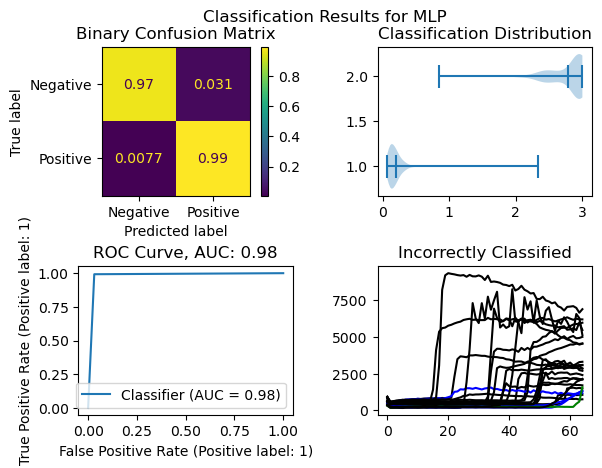

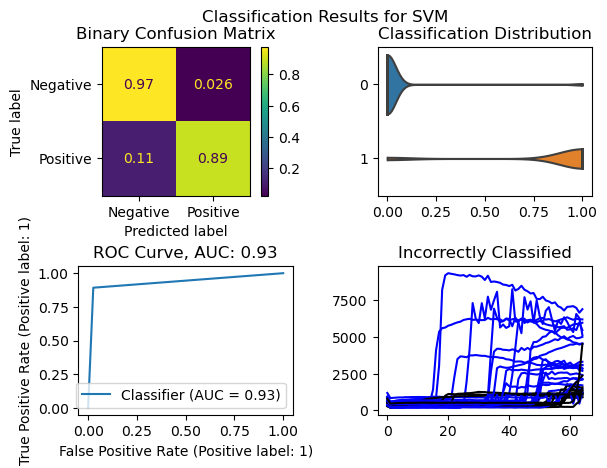

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])

## Unsupervised - Analysis

### Create New Object

In [ ]:
### Analysis
raw_ml_quic = copy.copy(ml_quic)
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR);

Loading Data from ../Data/BigAnalysis


### Add KMeans Model

In [ ]:
### Add KMeans to the list of models to test
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3), model_name='KMeans', data_type='analysis', tag='Unsupervised')
ml_quic.separate_train_test(model_names=['KMeans'], train_type=3)

[{'KMeans': array([2178, 4754, 5008, ..., 2992, 7914,  610])},
 {'KMeans': array([5069, 2978,  547, ...,   14, 1750, 4157])}]

### Train and Compare Unsupervised Models

c:\Users\howey024\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans:
              precision    recall  f1-score   support

         neg       0.89      1.00      0.94      7991
         pos       0.90      0.20      0.32      1273

    accuracy                           0.89      9264
   macro avg       0.89      0.60      0.63      9264
weighted avg       0.89      0.89      0.85      9264

-------- Results on False Positives for KMeans --------
Accuracy on False Positives: 0.9003690036900369
False Positives Account for 3.04% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 36.5
Average RAF: 0.028684599703703708
Average MPR: 20.653144036555553
Average MS: 884.6111111111111
Correctly Classified FP Characteristics:
Average Time to Threshold: 34.79704918032787
Average RAF: 0.03452495003278688
Average MPR: 6.885332659860656
Average MS: 618.7325819672132
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Averag

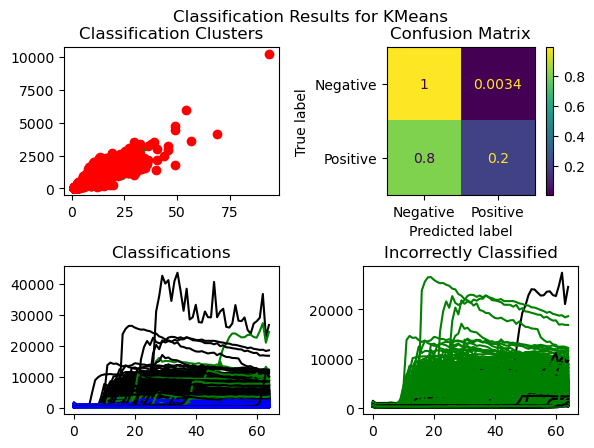

In [ ]:
### Get Unsupervised Scores and Plots
ml_quic.train_models(tags=['Unsupervised'])
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])

### Add Supervised Learning Technique (SVM)

In [ ]:
### SVM
from Models import SVM
imp.reload(SVM)

# Add SVM to list of supervised models
ml_quic.add_model(SVM.SVM(), model_name = 'SVM', data_type = 'raw', tag = 'Supervised')

In [ ]:
### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

SVM:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.98       792
         pos       0.88      0.95      0.91       134

    accuracy                           0.97       926
   macro avg       0.93      0.96      0.95       926
weighted avg       0.97      0.97      0.97       926

-------- Results on False Positives for SVM --------
Accuracy on False Positives: 0.32
False Positives Account for 68.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 31.323529411764707
Average RAF: 0.03552252682352941
Average MPR: 9.51332905664706
Average MS: 811.9705882352941
Correctly Classified FP Characteristics:
Average Time to Threshold: 37.125
Average RAF: 0.033199769
Average MPR: 3.712471818
Average MS: 258.4375
-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.424414768263944, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.048363688274941086, Max: 0.222222222


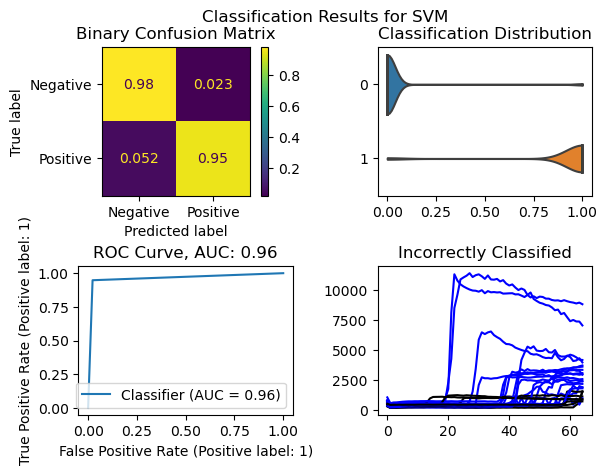

In [ ]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])